/var/folders/2q/dqd5wpp51ln23n26hm01cvym0000gn/T/ipykernel_29707/811465263.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


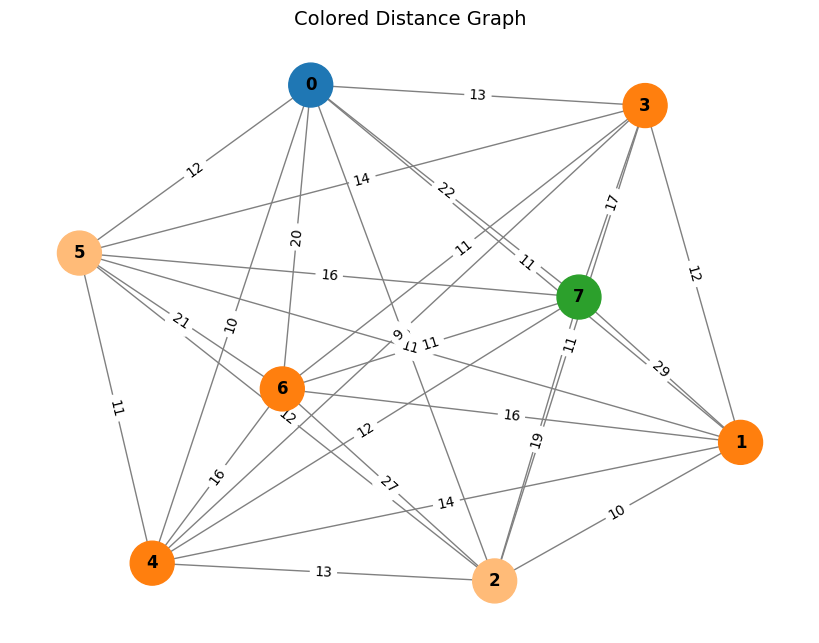

In [31]:
import matplotlib.pyplot as plt
import networkx as nx

# Completed symmetric distance matrix
# distance_matrix = [
#     [0, 10, 15, 20, 18],
#     [10, 0, 10, 15, 20],
#     [15, 10, 0, 15, 10],
#     [20, 15, 15, 0, 12],
#     [18, 20, 10, 12, 0],
# ]

# distance_matrix_without_public_stations = [
#     [0, 10, 15, 20],
#     [10, 0, 10, 15],
#     [15, 10, 0, 15],
#     [20, 15, 15, 0],
# ]

distance_matrix = [
    [0, 11, 9, 13, 10, 12, 20, 22],   # 0
    [11, 0, 10, 12, 14, 11, 16, 29],  # 1
    [9, 10, 0, 11, 13, 12, 27, 19],   # 2
    [13, 12, 11, 0, 9, 14, 11, 17],   # 3
    [10, 14, 13, 9, 0, 11, 16, 12],   # 4
    [12, 11, 12, 14, 11, 0, 21, 16],  # 5
    [20, 16, 27, 11, 16, 21, 0, 11],  # 6
    [22, 29, 19, 17, 12, 16, 11, 0],  # 7
]

distance_matrix_without_public_stations = [
    [0, 11, 9, 13, 10, 12],   # 0
    [11, 0, 10, 12, 14, 11],  # 1
    [9, 10, 0, 11, 13, 12],   # 2
    [13, 12, 11, 0, 9, 14],   # 3
    [10, 14, 13, 9, 0, 11],   # 4
    [12, 11, 12, 14, 11, 0],  # 5
]


# Create the graph
G = nx.Graph()
n = len(distance_matrix)

# Add edges with weights
for i in range(n):
    for j in range(i + 1, n):
        weight = distance_matrix[i][j]
        if weight > 0:
            G.add_edge(i, j, weight=weight)

# Set node colors
node_colors = {
    0: "#1f77b4",  # depot
    1: "#ff7f0e",  # customer
    2: "#ffbb78",  # customer with cs
    3: "#ff7f0e",  # customer
    4: "#ff7f0e",  # customer
    5: "#ffbb78",  # customer with cs
    6: "#ff7f0e",  # customer
    7: "#2ca02c",  # green
}

# Use spring layout
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=[node_colors[n] for n in G.nodes()],
    node_size=1000,
    font_weight="bold",
    edge_color="gray"
)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Colored Distance Graph", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


/var/folders/2q/dqd5wpp51ln23n26hm01cvym0000gn/T/ipykernel_29707/1810363547.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


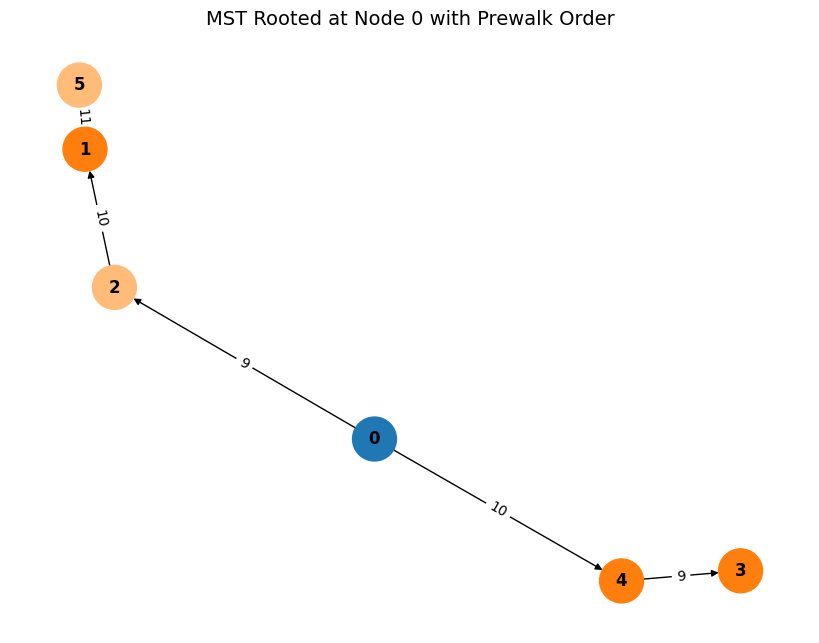

/var/folders/2q/dqd5wpp51ln23n26hm01cvym0000gn/T/ipykernel_29707/1810363547.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


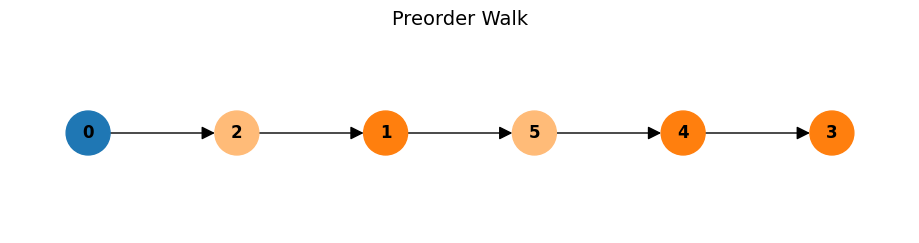

In [32]:
def plot_and_return_prewalk(distance_matrix, root=0):
    # Build the full graph
    G = nx.Graph()
    n = len(distance_matrix)
    for i in range(n):
        for j in range(i + 1, n):
            weight = distance_matrix[i][j]
            if weight > 0:
                G.add_edge(i, j, weight=weight)

    # Get undirected MST
    mst = nx.minimum_spanning_tree(G)

    # Convert to directed MST rooted at `root` using BFS
    rooted_tree = nx.DiGraph()
    visited = set()
    queue = [root]

    while queue:
        current = queue.pop(0)
        visited.add(current)
        for neighbor in mst.neighbors(current):
            if neighbor not in visited:
                rooted_tree.add_edge(current, neighbor, weight=mst[current][neighbor]['weight'])
                queue.append(neighbor)

    # Preorder DFS traversal
    prewalk = []

    def dfs(node):
        prewalk.append(node)
        for neighbor in sorted(rooted_tree.neighbors(node)):
            dfs(neighbor)

    dfs(root)

    # Layout
    try:
        pos = nx.nx_agraph.graphviz_layout(rooted_tree, prog='dot')
    except:
        pos = nx.spring_layout(rooted_tree, seed=42)

    # Plot
    plt.figure(figsize=(8, 6))
    nx.draw(
        rooted_tree,
        pos,
        with_labels=True,
        node_color=[node_colors[n] for n in rooted_tree.nodes()],
        node_size=1000,
        font_weight="bold",
        edge_color="black",
        arrows=True
    )
    edge_labels = nx.get_edge_attributes(rooted_tree, "weight")
    nx.draw_networkx_edge_labels(rooted_tree, pos, edge_labels=edge_labels)

    plt.title(f"MST Rooted at Node {root} with Prewalk Order", fontsize=14)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    return prewalk

def plot_prewalk_order(prewalk, node_colors):
    G = nx.DiGraph()

    # Add edges in prewalk sequence
    for i in range(len(prewalk) - 1):
        G.add_edge(prewalk[i], prewalk[i + 1])

    # Position nodes in a horizontal line
    pos = {node: (i, 0) for i, node in enumerate(prewalk)}

    # Draw
    plt.figure(figsize=(1.5 * len(prewalk), 2))
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color=[node_colors[n] for n in prewalk],
        node_size=1000,
        font_weight="bold",
        edge_color="black",
        arrows=True,
        arrowsize=20,
    )

    plt.title("Preorder Walk", fontsize=14)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

prewalk = plot_and_return_prewalk(distance_matrix_without_public_stations)
plot_prewalk_order(prewalk, node_colors)